<a href="https://colab.research.google.com/github/DanielVinicius2/Ciencia-de-Dados/blob/main/U3A1_atividade_escalonamento_e_padroniza%C3%A7%C3%A3o_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Atividade Prática Interativa: Normalização e Padronização de Dados
## Ciência de Dados


In [ ]:
# TODO: Importe as bibliotecas necessárias
# Você precisa de: pandas, numpy, matplotlib.pyplot, seaborn
# E de sklearn: MinMaxScaler, StandardScaler, RobustScaler, KNeighborsClassifier, train_test_split, accuracy_score, classification_report, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# COMPLETE AQUI: Importe os escaladores do sklearn.preprocessing
# from sklearn.preprocessing import ...

# COMPLETE AQUI: Importe o KNeighborsClassifier do sklearn.neighbors
# from sklearn.neighbors import ...

# COMPLETE AQUI: Importe train_test_split do sklearn.model_selection
# from sklearn.model_selection import ...

# COMPLETE AQUI: Importe as métricas do sklearn.metrics
# from sklearn.metrics import ...

import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
%matplotlib inline

print('✅ Bibliotecas importadas com sucesso!')

✅ Bibliotecas importadas com sucesso!


---

# 📊 EXERCÍCIO 1: Carregar e Explorar Dados com Pandas

**Objetivo:** Criar um dataset de imóveis e explorar suas características.

**Instruções:**
1. Complete o código para criar um DataFrame com os dados de imóveis
2. Use `pd.DataFrame()` com um dicionário
3. Mostre o DataFrame e suas estatísticas

In [ ]:
# TODO: Crie um dicionário com dados de imóveis
# Colunas: 'preco', 'area', 'quartos', 'idade_imovel'
# Use os valores fornecidos abaixo:

dados = {
    'preco': [300000, 450000, 550000, 750000, 850000, 1000000, 1200000, 1500000],
    'area': [120, 150, 180, 200, 220, 250, 280, 320],
    'quartos': [3, 3, 4, 4, 4, 5, 5, 6],
    'idade_imovel': [10, 5, 15, 2, 8, 3, 12, 1]
}

# TODO: Crie um DataFrame chamado 'df' a partir do dicionário 'dados'
# df = pd.DataFrame(...)
df = pd.DataFrame(dados)
# TODO: Mostre o DataFrame
# print(df)
print(df)
# TODO: Mostre as estatísticas descritivas
# print(df.describe())
print(df.describe())

     preco  area  quartos  idade_imovel
0   300000   120        3            10
1   450000   150        3             5
2   550000   180        4            15
3   750000   200        4             2
4   850000   220        4             8
5  1000000   250        5             3
6  1200000   280        5            12
7  1500000   320        6             1
              preco        area   quartos  idade_imovel
count  8.000000e+00    8.000000  8.000000      8.000000
mean   8.250000e+05  215.000000  4.250000      7.000000
std    4.008919e+05   66.761837  1.035098      5.070926
min    3.000000e+05  120.000000  3.000000      1.000000
25%    5.250000e+05  172.500000  3.750000      2.750000
50%    8.000000e+05  210.000000  4.000000      6.500000
75%    1.050000e+06  257.500000  5.000000     10.500000
max    1.500000e+06  320.000000  6.000000     15.000000


### ❓ Pergunta 1.1
**Qual coluna tem a maior escala (diferença entre mín e máx)? Por que isso é um problema?**

*Escreva sua resposta aqui:* A Coluna 'preco', Isso se torna um problema pelo fato de serem valores exorbitantes, logo a disparidade entre os valores de X são notorias. Também em relação a comparação visual que fica destoanteç. E, pode ser prejudical ao machine learning, podendo 'pesar' mais no aprendizado da maquina.

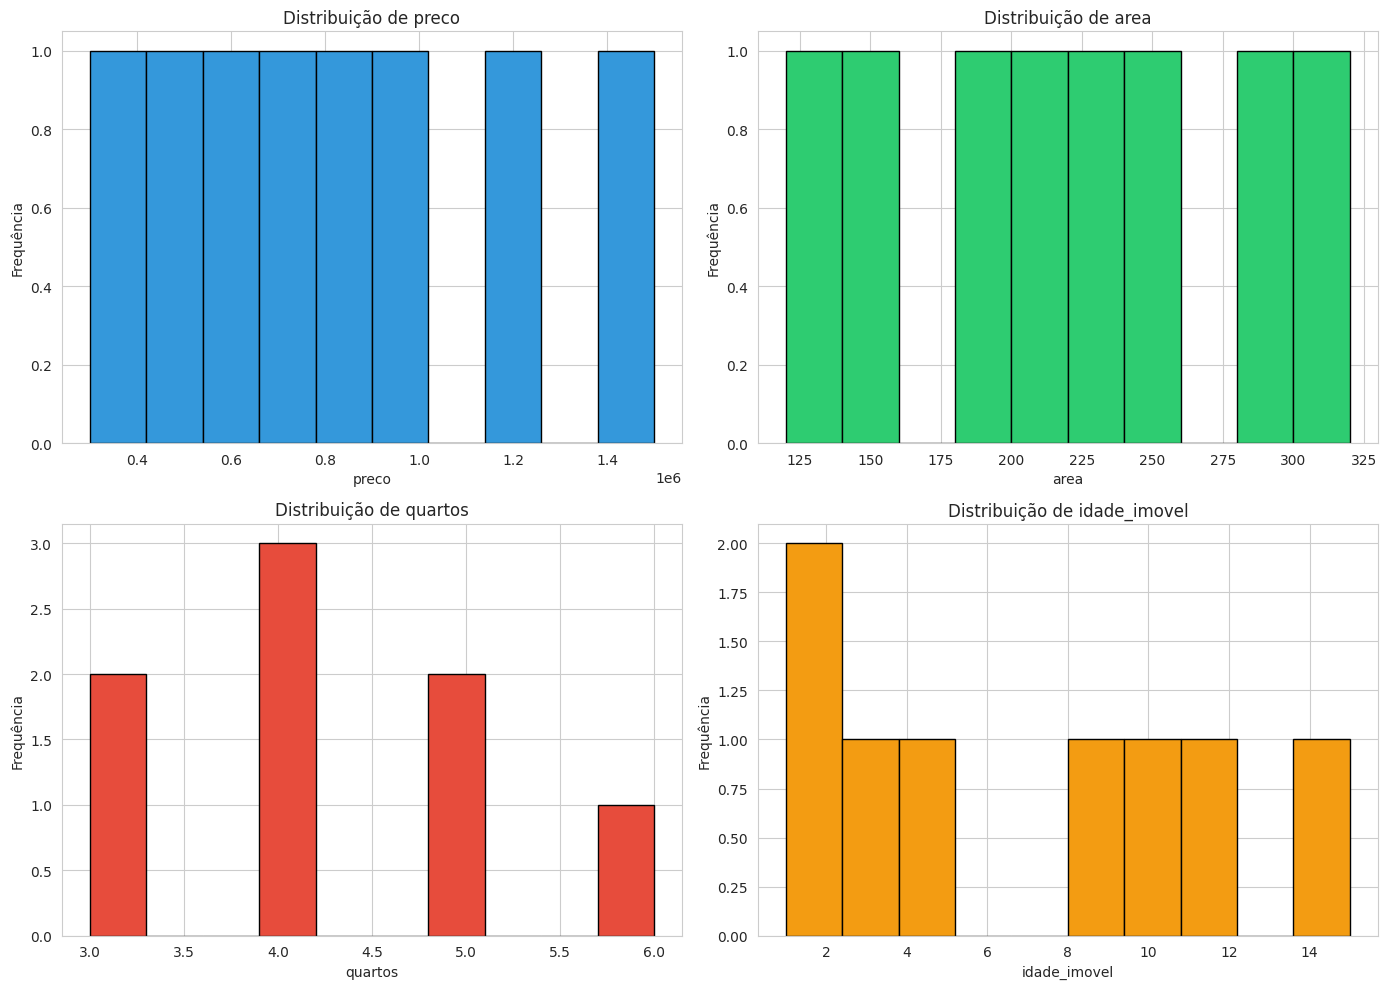

⚠️ OBSERVE: Os eixos X têm escalas muito diferentes!


In [ ]:
# TODO: Crie 4 histogramas (um para cada coluna) para visualizar a distribuição
# Use: fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Para cada subplot, use: axes[i, j].hist(df['coluna'], bins=10, color='cor', edgecolor='black')
#
# DICA: Use cores diferentes para cada histograma:
# '#3498DB' (azul), '#2ECC71' (verde), '#E74C3C' (vermelho), '#F39C12' (laranja)

# Seu código aqui:
cores = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12']

# fig, axes = plt.subplots(...)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colunas = df.columns
# axes[0, 0].hist(...)
# axes[0, 1].hist(...)
# axes[1, 0].hist(...)
# axes[1, 1].hist(...)
for i in range(2):
    for j in range(2):
        idx = i * 2 + j  # índice da coluna
        axes[i, j].hist(df[colunas[idx]], bins=10, color=cores[idx], edgecolor='black')
        axes[i, j].set_title(f'Distribuição de {colunas[idx]}', fontsize=12)
        axes[i, j].set_xlabel(colunas[idx])
        axes[i, j].set_ylabel('Frequência')
# plt.tight_layout()
plt.tight_layout()
# plt.show()
plt.show()

print('⚠️ OBSERVE: Os eixos X têm escalas muito diferentes!')

---

# 📊 EXERCÍCIO 2: Normalização com MinMaxScaler

**Fórmula:** `x' = (x - min) / (max - min)`

**Resultado:** Todos os valores ficam entre 0 e 1

**Instruções:**
1. Importe MinMaxScaler do sklearn.preprocessing
2. Crie uma instância do scaler
3. Aplique fit_transform() aos dados
4. Crie um novo DataFrame com os dados normalizados

In [ ]:
# TODO: Importe MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# TODO: Crie uma instância do MinMaxScaler
scaler_mm = MinMaxScaler()

# TODO: Aplique fit_transform() aos dados do DataFrame 'df'
df_minmax = scaler_mm.fit_transform(df)

# TODO: Crie um novo DataFrame com os dados normalizados
df_minmax = pd.DataFrame(df_minmax, columns=df.columns)

# TODO: Mostre o DataFrame normalizado

print(df_minmax)
# TODO: Mostre as estatísticas dos dados normalizados do Dataframe

print(df_minmax.describe())

      preco  area   quartos  idade_imovel
0  0.000000  0.00  0.000000      0.642857
1  0.125000  0.15  0.000000      0.285714
2  0.208333  0.30  0.333333      1.000000
3  0.375000  0.40  0.333333      0.071429
4  0.458333  0.50  0.333333      0.500000
5  0.583333  0.65  0.666667      0.142857
6  0.750000  0.80  0.666667      0.785714
7  1.000000  1.00  1.000000      0.000000
          preco      area   quartos  idade_imovel
count  8.000000  8.000000  8.000000      8.000000
mean   0.437500  0.475000  0.416667      0.428571
std    0.334077  0.333809  0.345033      0.362209
min    0.000000  0.000000  0.000000      0.000000
25%    0.187500  0.262500  0.250000      0.125000
50%    0.416667  0.450000  0.333333      0.392857
75%    0.625000  0.687500  0.666667      0.678571
max    1.000000  1.000000  1.000000      1.000000


### ❓ Pergunta 2.1
**Qual é o valor mínimo e máximo de cada coluna normalizada? Por que todos ficam entre 0 e 1?**

*Escreva sua resposta aqui:* O minimo e o maximo em todas as colunas são respectivamente: 0 e 1. Fica entre 0 e 1 porque subtraímos o mínimo (deixa o menor valor em 0) e dividimos pela diferença total (faz o maior valor virar 1).

In [ ]:
# TODO: Calcule manualmente a normalização do preço do primeiro imóvel
# Siga os passos:
# 1. Obtenha o valor mínimo de 'preco': preco_min = df['preco'].min()
# 2. Obtenha o valor máximo de 'preco': preco_max = df['preco'].max()
# 3. Obtenha o primeiro valor de 'preco': preco_primeiro = df['preco'].iloc[0]
# 4. Aplique a fórmula: preco_normalizado = (preco_primeiro - preco_min) / (preco_max - preco_min)
# 5. Compare com o valor no DataFrame normalizado

# Seu código aqui:
# preco_min = ...
# preco_max = ...
# preco_primeiro = ...
# preco_normalizado_manual = ...
# print(f'Valor calculado: {preco_normalizado_manual:.4f}')
# print(f'Valor no DataFrame: {df_normalized["preco"].iloc[0]:.4f}')
# print(f'Diferença: {abs(preco_normalizado_manual - df_normalized["preco"].iloc[0]):.10f}')

---

# 📊 EXERCÍCIO 3: Padronização com StandardScaler

**Fórmula:** `z = (x - μ) / σ`

**Resultado:** Média = 0, Desvio Padrão = 1

**Instruções:**
1. Importe StandardScaler do sklearn.preprocessing
2. Crie uma instância do scaler
3. Aplique fit_transform() aos dados
4. Crie um novo DataFrame com os dados padronizados

In [ ]:
# TODO: Importe StandardScaler
from sklearn.preprocessing import StandardScaler

# TODO: Crie uma instância do StandardScaler
scaler_ss = StandardScaler()

# TODO: Aplique fit_transform() aos dados do DataFrame 'df'
df_scaler = scaler_ss.fit_transform(df)

# TODO: Crie um novo DataFrame com os dados padronizados
df_scaler = pd.DataFrame(df_scaler, columns=df.columns)

# TODO: Mostre o DataFrame padronizado
print(df_scaler)

# TODO: Mostre as estatísticas dos dados padronizados
print(df_scaler.describe())

      preco      area   quartos  idade_imovel
0 -1.400000 -1.521217 -1.290994      0.632456
1 -1.000000 -1.040833 -1.290994     -0.421637
2 -0.733333 -0.560449 -0.258199      1.686548
3 -0.200000 -0.240192 -0.258199     -1.054093
4  0.066667  0.080064 -0.258199      0.210819
5  0.466667  0.560449  0.774597     -0.843274
6  1.000000  1.040833  0.774597      1.054093
7  1.800000  1.681346  1.807392     -1.264911
          preco      area   quartos  idade_imovel
count  8.000000  8.000000  8.000000  8.000000e+00
mean   0.000000  0.000000  0.000000 -1.387779e-17
std    1.069045  1.069045  1.069045  1.069045e+00
min   -1.400000 -1.521217 -1.290994 -1.264911e+00
25%   -0.800000 -0.680545 -0.516398 -8.959787e-01
50%   -0.066667 -0.080064 -0.258199 -1.054093e-01
75%    0.600000  0.680545  0.774597  7.378648e-01
max    1.800000  1.681346  1.807392  1.686548e+00


### ❓ Pergunta 3.1
**Qual é a média e o desvio padrão dos dados padronizados? O que você observa?**

*Escreva sua resposta aqui:*Media = 0, Desvio Padrão = 1

In [ ]:
# TODO: Calcule manualmente a padronização da área do primeiro imóvel
# Siga os passos:
# 1. Obtenha a média de 'area': area_media = df['area'].mean()

# 2. Obtenha o desvio padrão de 'area': area_std = df['area'].std()
# 3. Obtenha o primeiro valor de 'area': area_primeiro = df['area'].iloc[0]
# 4. Aplique a fórmula: area_padronizado = (area_primeiro - area_media) / area_std
# 5. Compare com o valor no DataFrame padronizado

# Seu código aqui:
df_standardized = (df - df.mean()) / df.std()
# area_media = ...
area_media = df['area'].mean()
# area_std = ...
area_std = df['area'].std()
# area_primeiro = ...
area_primeiro = df['area'].iloc[0]
# area_padronizado_manual = ...

area_padronizado_manual = (area_primeiro - area_media) / area_std
# print(f'Valor calculado: {area_padronizado_manual:.4f}')
# print(f'Valor no DataFrame: {df_standardized["area"].iloc[0]:.4f}')
# print(f'Diferença: {abs(area_padronizado_manual - df_standardized["area"].iloc[0]):.10f}')
print(f'Valor calculado manualmente: {area_padronizado_manual:.4f}')
print(f'Valor no DataFrame padronizado: {df_standardized["area"].iloc[0]:.4f}')
print(f'Diferença: {abs(area_padronizado_manual - df_standardized["area"].iloc[0]):.10f}')

Valor calculado manualmente: -1.4230
Valor no DataFrame padronizado: -1.4230
Diferença: 0.0000000000


---

# 📊 EXERCÍCIO 4: Comparar Normalização vs. Padronização

**Objetivo:** Visualizar as diferenças entre as duas técnicas.

**Instruções:**
1. Crie 4 subplots (2x2)
2. Primeiro: Histograma dos dados originais (preço)
3. Segundo: Histograma dos dados normalizados (preço)
4. Terceiro: Histograma dos dados padronizados (preço)
5. Quarto: Tabela comparativa com min, máx, média e desvio padrão

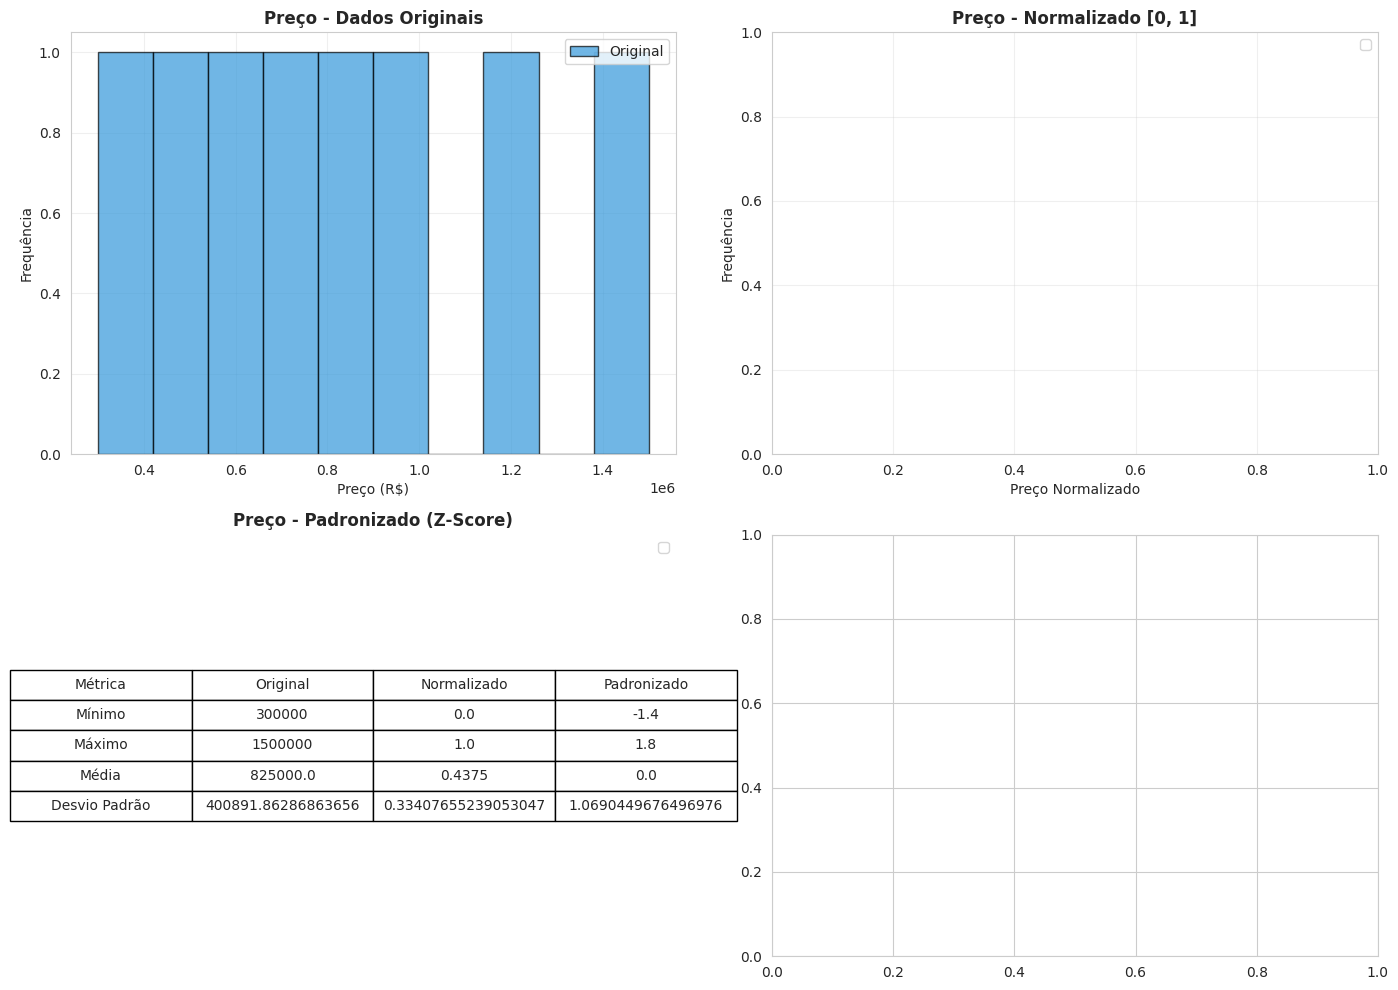

In [ ]:
# TODO: Crie 4 subplots (2x2)
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# TODO: Subplot [0, 0] - Histograma dos dados originais (preço)
Subplot = axes[0, 0]
# axes[0, 0].hist(df['preco'], bins=10, alpha=0.7, label='Original', color='#3498DB', edgecolor='black')
Subplot.hist(df['preco'], bins=10, alpha=0.7, label='Original', color='#3498DB', edgecolor='black')
# axes[0, 0].set_title('Preço - Dados Originais', fontweight='bold')
Subplot.set_title('Preço - Dados Originais', fontweight='bold')
# axes[0, 0].set_xlabel('Preço (R$)')
Subplot.set_xlabel('Preço (R$)')
# axes[0, 0].set_ylabel('Frequência')
Subplot.set_ylabel('Frequência')
# axes[0, 0].legend()
Subplot.legend()
# axes[0, 0].grid(True, alpha=0.3)
Subplot.grid(True, alpha=0.3)

# TODO: Subplot [0, 1] - Histograma dos dados normalizados (preço)
# axes[0, 1].hist(...)
Subplot = axes[0, 1]
# axes[0, 1].set_title('Preço - Normalizado [0, 1]', fontweight='bold')
Subplot.set_title('Preço - Normalizado [0, 1]', fontweight='bold')
# axes[0, 1].set_xlabel('Preço Normalizado')
Subplot.set_xlabel('Preço Normalizado')
# axes[0, 1].set_ylabel('Frequência')
Subplot.set_ylabel('Frequência')
# axes[0, 1].legend()
Subplot.legend()
# axes[0, 1].grid(True, alpha=0.3)
Subplot.grid(True, alpha=0.3)

# TODO: Subplot [1, 0] - Histograma dos dados padronizados (preço)
# axes[1, 0].hist(...)
Subplot = axes[1, 0]
# axes[1, 0].set_title('Preço - Padronizado (Z-Score)', fontweight='bold')
Subplot.set_title('Preço - Padronizado (Z-Score)', fontweight='bold')
# axes[1, 0].set_xlabel('Preço Padronizado')
Subplot.set_xlabel('Preço Padronizado')
# axes[1, 0].set_ylabel('Frequência')
Subplot.set_ylabel('Frequência')
# axes[1, 0].legend()
Subplot.legend()
# axes[1, 0].grid(True, alpha=0.3)
Subplot.grid(True, alpha=0.3)

# TODO: Subplot [1, 1] - Tabela comparativa
# Crie uma tabela com: Métrica, Original, Normalizado, Padronizado
# Linhas: Mín, Máx, Média, Desvio Padrão
# Use: axes[1, 1].table(cellText=comparacao_data, cellLoc='center', loc='center')

# Seu código aqui:
# fig, axes = plt.subplots(...)
comparacao_data = [
    ['Mínimo', df['preco'].min(), df_minmax['preco'].min(), df_scaler['preco'].min()],
    ['Máximo', df['preco'].max(), df_minmax['preco'].max(), df_scaler['preco'].max()],
    ['Média', df['preco'].mean(), df_minmax['preco'].mean(), df_scaler['preco'].mean()],
    ['Desvio Padrão', df['preco'].std(), df_minmax['preco'].std(), df_scaler['preco'].std()]
]
# ...
tabela = Subplot.table(
    cellText=comparacao_data,
    colLabels=['Métrica', 'Original', 'Normalizado', 'Padronizado'],
    cellLoc='center',
    loc='center'
)
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.2, 1.5)
Subplot.axis('off')

# plt.tight_layout()
plt.tight_layout()

# plt.show()
plt.show()

### ❓ Pergunta 4.1
**Qual é a diferença principal entre Normalização e Padronização? Quando você usaria cada uma?**

*Escreva sua resposta aqui:*
A normalização deve ser usada quando queremos ajustar todos os valores para uma mesma escala fixa, geralmente entre 0 e 1, para evitar que variáveis com valores muito altos dominem o modelo.
Ela é indicada em algoritmos sensíveis à magnitude dos dados, como redes neurais ou métodos baseados em distância (KNN, SVM), e também quando os dados não seguem uma distribuição normal.
No entanto, ela pode ser afetada por valores extremos (outliers), já que eles puxam os limites mínimo e máximo do intervalo.
A padronização é usada quando queremos centralizar os dados em torno da média 0 e desvio padrão 1, sem limitar os valores a um intervalo fixo.
Ela é menos sensível a outliers do que a normalização e mantém a forma da distribuição original dos dados.
É indicada para modelos que assumem uma distribuição aproximadamente normal ou que dependem de medidas de distância, como KNN, K-Means, SVM e Regressão Linear.

---

# 📝 Resumo das Aprendizagens

## O que você aprendeu:

### 1️⃣ **Normalização (Min-Max)**
- **Fórmula:** `x' = (x - min) / (max - min)`
- **Intervalo:** [0, 1]
- **Quando usar:** Redes neurais, dados sem outliers
- **Vantagem:** Simples e intuitiva
- **Desvantagem:** Sensível a outliers

### 2️⃣ **Padronização (Z-Score)**
- **Fórmula:** `z = (x - μ) / σ`
- **Intervalo:** (-∞, +∞), geralmente [-3, 3]
- **Quando usar:** Regressão, distribuições normais
- **Vantagem:** Preserva informações estatísticas
- **Desvantagem:** Menos Sensível a outliers


### 3️⃣ **Bibliotecas Python**
- **Scikit-learn:** MinMaxScaler, StandardScaler, RobustScaler
- **Pandas:** Manipulação de dados
- **NumPy:** Operações numéricas

